### Model from Bard:



#### Equations:

dV/dt=Gv*I/(1+kvf*f) - Gvh*V*H - alphav*V - (av1*V)/(1+av2*V)

dH/dt=Bhd*d*H*((H-ep)/(H+ep)) - Ghv*V*H-khf*f*h

dI/dt=Ghv*H*V/(1+kif*f) - ai*I

df/dt=(cfi*i-delf*f+kfh*d*f+kff*f^2/(1+b2*f^2))/tauf

D=1-H-I (substituted in below)

#aux d=d

#### Parameters: 

par delf=.5,cfi=2

par kvf=5,kif=3,tauf=2

param Gv=20,Gvh=0.7,alphav=1.7

par kfh=.3,khf=.3,kff=1.2,b2=1

param av1=28,av2=1550

param Bhd=4,Ghv=0.7,ai=1.5,ep=0.1

param bFH=17,bF=125,aF=8,aR=1

#### Initial Values:
init H=1,V=0.01, F=.2, I=0


{xpp stuff: 
@ method=qualrk, tol=1e-10, dt=0.05, total=80, bounds=1e70

@ xp=V, yp=H, xlo=-0.1, xhi=4, ylo=-0.1, yhi=1.1, bell=0 }

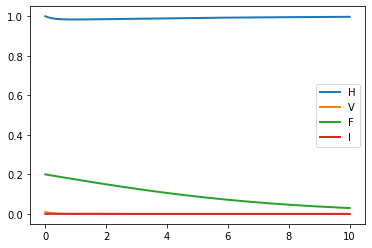

In [1]:
from ipywidgets import *
import tellurium as te
import matplotlib.pyplot as plt
import numpy as np

antStr = '''
model updatedModel()
    # Parameters (these are all constant):
    delf = .5; cfi=2; kvf = 5; kif=3; tauf=2;
    Gv=20; Gvh=0.7; alphav=1.7; kfh=.3; khf=.3; kff=1.2; b2=1;
    av1=28; av2=1550; Bhd=4; Ghv=0.7; ai=1.5; ep=0.1;
    bfH=17; bF=125; aF=8; aR=1;
    
    # Equations (the letter after the arrow defines the variable, and the eqn after the semicolon defines the right hand side of the ODE):
    -> V; Gv*I/(1+kvf*F) - Gvh*V*H - alphav*V - (av1*V)/(1+av2*V)
    -> I; Ghv*H*V/(1+kif*F) - ai*I
    -> H; Bhd*(1-H-I)*H*((H-ep)/(H+ep)) - Ghv*V*H-khf*F*H
    -> F; (cfi*I-delf*F+kfh*(1-H-I)*F+kff*F^2/(1+b2*F^2))/tauf
   
    # Initial Conditions (the initial levels of each variable):
    V = 0.01; H = 1; F = 0.2; I=0;

end'''
rr = te.loadAntimonyModel(antStr)

rr.simulate(0,10,1000,['Time','H','V','F','I']) #simulates the model from time t=0 to t=10 with 1000 steps in between
rr.plot()

Code below lets you play with parameters for initial virus V0, replication rate of virus Gv, and initial interferon value F0.

In [2]:
def replot(V0,Gv,F0):
    rr.resetAll()
    rr.V=V0
    rr.Gv=Gv
    rr.F=F0
    m = rr.simulate(0, 10,1000)
    rr.plot()
    
Gv=widgets.FloatLogSlider(description="Gv",value=20,min=-1.0, max=3.0)
V0=widgets.FloatLogSlider(description="V0",value=0.01,min=-3.0, max=2.0)
F0=widgets.FloatLogSlider(description="F0",value=.05,min=-1,max=2)

ui=widgets.HBox([V0,Gv,F0])
out=widgets.interactive_output(replot,{'V0':V0, 'Gv':Gv, 'F0':F0})
display(ui,out)

Output()